In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score,mean_squared_error
import matplotlib.pyplot as plt

In [13]:
syn_data=pd.read_csv('C:/Users/SHUBHAM/Desktop/synthetic_data.csv')  #reading a csv file

syn_frame=pd.DataFrame(syn_data)    # generating a dataframe



In [14]:
Y=syn_data['Outcome']              # defining features and target values
X=syn_data.drop('Outcome',axis=1)

#splitting dataset to training and test data...
X_Train,X_test,Y_Train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)

#scaling input matrix
scaler = StandardScaler()
X_Train = scaler.fit_transform(X_Train)
X_test = scaler.transform(X_test)

In [15]:
# defining regression parameters....
l_rate = 0.01                         #learning rate
batch_size= 50                       #batch size
iteration = 1000                     #No. of iterations
weight = np.zeros(X_Train.shape[1])  #weights
b=0                                  #bias`
cost = np.zeros(iteration)           #intializing cost function
samples , features = X_Train.shape
for i in range(iteration):
    
    index = np.random.permutation(samples)
    
    #generating random samples from training data of a random batchsize
    for j in range(0,samples,batch_size):
        X_batch = X_Train[j:j + batch_size]             
        Y_batch = Y_Train[j:j + batch_size]
        y_pred = np.dot(X_batch,weight) + b
        w_gradient = 2*np.dot(X_batch.T,y_pred - Y_batch)/len(Y_batch)
        b_gradient = np.mean(y_pred - Y_batch)
        weight -= l_rate*w_gradient
        b -= l_rate*b_gradient
    
    cost[i] = np.mean((y_pred - Y_batch)**2)   # updating cost function per iteration
      
        
        
    

    
    
    


In [16]:
print("weight : ",weight)

weight :  [ 0.05142494  0.12085839 -0.04079947 -0.0322728   0.02884628  0.10548724
  0.03097932  0.02128159]


In [17]:
print("bias : ",b)

bias :  0.3623994488808076


In [18]:
y_pred_test = np.dot(X_test , weight) + b # predicting test datasets

In [19]:
r2_scr = r2_score(Y_test,y_pred_test)        #calculating r2_score
print('The r2_score obtained is :',round(r2_scr * 100 ,2),'%')

mse = mean_squared_error(Y_test,y_pred_test)

print("mean squared error : ",mse)

The r2_score obtained is : 17.99 %
mean squared error :  0.19116328697208462


Text(0, 0.5, 'Cost Function')

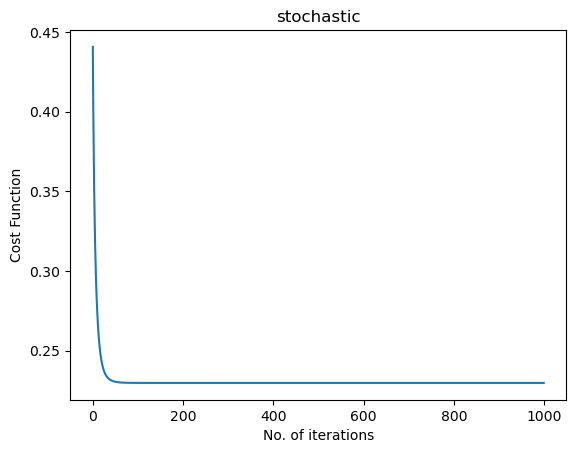

In [22]:
plt.plot(cost)
plt.title("stochastic")# plotting cost function Vs Iteration
plt.xlabel("No. of iterations")
plt.ylabel("Cost Function")